In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [169]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [170]:
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
print(test_df.shape)
test_df.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [172]:
# To check the dtype and numbers of null values present in both the train n test set
train_df.info()
print('=='*20)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [173]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

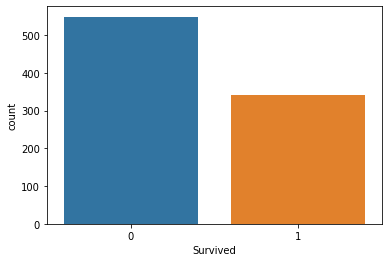

In [175]:
sns.countplot(train_df['Survived'])

In [176]:
train_df['Sex'].unique()
test_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [177]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [178]:
train_df['Sex']=label.fit_transform(train_df['Sex'])
test_df["Sex"]=label.fit_transform(test_df['Sex'])

In [179]:
def feature_cleaning(actual):
    new = actual.copy()
    #complete the Age missing value by meidan()
    new['Age'].fillna(new['Age'].median(), inplace=True) 
    #complete the missing Embarked value by median
    new['Embarked'].fillna('S', inplace=True)
    #complete the missing fare value b median
    new['Fare'].fillna(new['Fare'].median(), inplace=True)
    #Group the Age into group
    new['AgeCat'] = pd.qcut(new['Age'], 6, labels=[1,2,3,4,5,6], duplicates='drop')
    #Group the Fare into group
    new['FareCat'] = pd.qcut(new['Fare'], 6, labels=[1,2,3,4,5,6], duplicates='drop')
    #Drop the cabin to ingonre it
    new = new.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Age', 'Fare'], axis=1)
    return new

In [180]:
train_cln, test_cln = feature_cleaning(train_df), feature_cleaning(test_df)

In [181]:
train_cln

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeCat,FareCat
0,0,3,1,1,0,S,2,1
1,1,1,0,1,0,C,5,6
2,1,3,0,0,0,S,3,2
3,1,1,0,1,0,S,5,6
4,0,3,1,0,0,S,5,2
...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,S,3,3
887,1,1,0,0,0,S,1,5
888,0,3,0,1,2,S,3,4
889,1,1,1,0,0,C,3,5


In [182]:
train = train_cln.apply(label.fit_transform)
test = test_cln.apply(label.fit_transform)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeCat,FareCat
0,0,2,1,1,0,2,1,0
1,1,0,0,1,0,0,4,5
2,1,2,0,0,0,2,2,1
3,1,0,0,1,0,2,4,5
4,0,2,1,0,0,2,4,1


In [183]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [185]:
from sklearn.svm import SVC

In [186]:
svm = SVC(C=100, gamma=0.1)

In [187]:
from sklearn.preprocessing import MinMaxScaler

In [188]:
std = MinMaxScaler()

In [189]:
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)

In [190]:
svm.fit(X_train_scaled, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [191]:
svm.score(X_test_scaled, y_test)

0.8022388059701493

In [192]:
params = {'depth': 4,
          'eval_metric': 'Accuracy',
          'iterations': 1000,
          'l2_leaf_reg': 1e-20,
#           'leaf_estimation_iterations': 10,
          'logging_level': 'Silent',
          'loss_function': 'Logloss',
          'random_seed': 42}

In [193]:
#Catboost
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(depth=4, eval_metric='Accuracy', iterations=1000, random_seed=42,
                            l2_leaf_reg=1e-20, leaf_estimation_iterations=10,
                             logging_level='Silent', loss_function='Logloss')

In [194]:
cat_clf.fit(X_train_scaled, y_train)

In [195]:
cat_clf.score(X_test_scaled, y_test)

0.8022388059701493

In [196]:
from sklearn.naive_bayes import GaussianNB

In [197]:
gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [198]:
gnb.score(X_test_scaled, y_test)

0.8022388059701493

In [199]:
# Predicting for submission on kaggle

y_pred = cat_clf.predict(test)
y_pred = list(map(int, y_pred))

In [202]:
Submit = pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived': y_pred})
Submit.to_csv('Submit.csv', index=False)